# 1.1 Introduction

* This dataset consists of tv shows and movies available on Netflix as of 2019. 
* The dataset is collected from Flixable which is a third-party Netflix search engine.
* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. 
* The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. 
* It will be interesting to explore what all other insights can be obtained from the same dataset.
* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# 1.2 Problem Statement

Some of the interesting questions (tasks) which can be performed on this dataset -

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Is Netflix has increasingly focusing on TV rather than movies in recent years.


# 1.3 About the dataset

netflix_titles.csv: The csv file contains information about the various movies and the data related to them:

* Show ID - unique ID of that particular show
* Type - type of the video - movie, TV Series etc.
* Title - title of the video
* Director - director name
* Cast - cast members 
* Country - country where it was released
* Data Added - date when it became live on NETFLIX
* Release Year - year of release
* Rating - user rating
* Duration - duration of the movie, TV Series etc.
* Listed in - Genre information
* Description - concise plot of the series

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

**Loading the Dataset**



In [2]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


We can clearly see that there are few columns which have null values

In [5]:
df.describe().T

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

<AxesSubplot:>

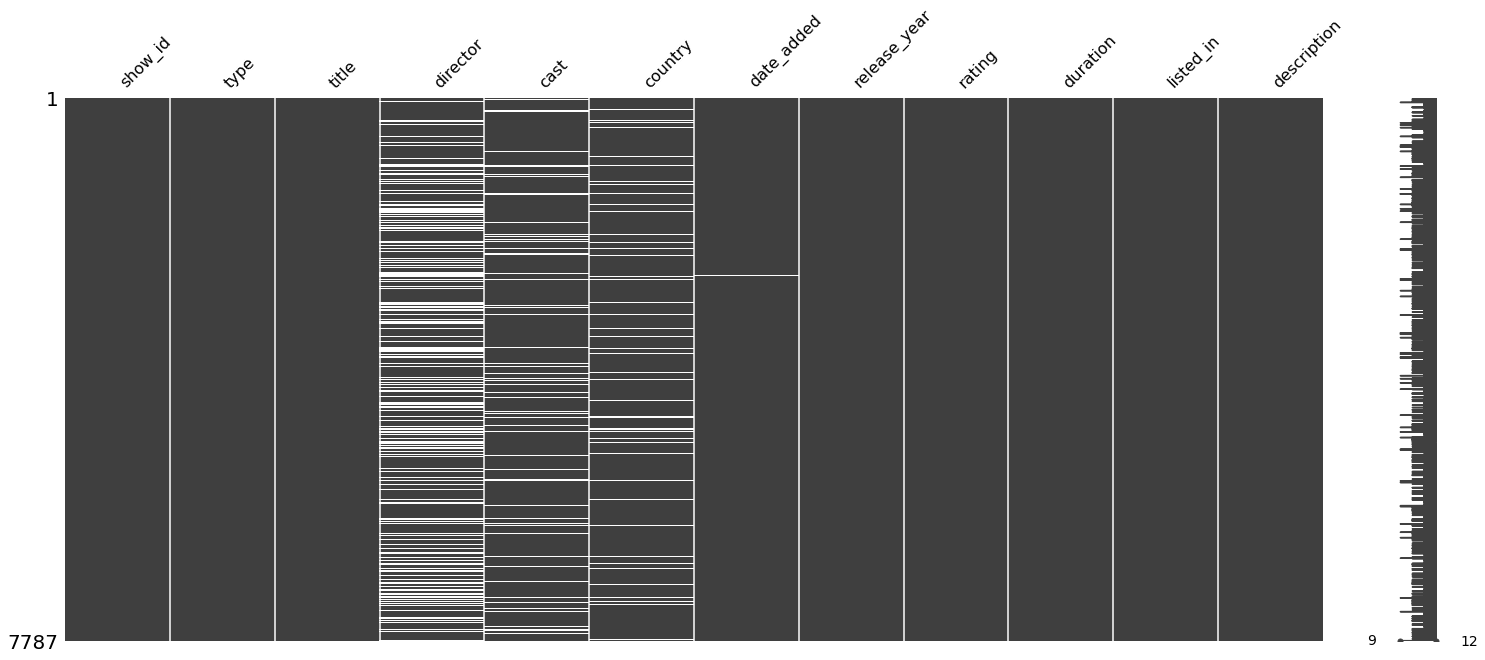

In [6]:
# Visualize missing values as a matrix
msno.matrix(df)

**Observation:** Using this matrix we can  quickly find the pattern of 'missingness' in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Observation:** The missing values are in:

* "director": Very less information-not needed for the analysis so I will be dropping this
* "cast": there are too many diferent values so I will be dropping this
* "country": Important variable hence we need to fix this
* "date_added": there are just a few cases, so lets scrap them
* "rating": there are just a few cases, so lets try finding thir replacements on the internet

<AxesSubplot:>

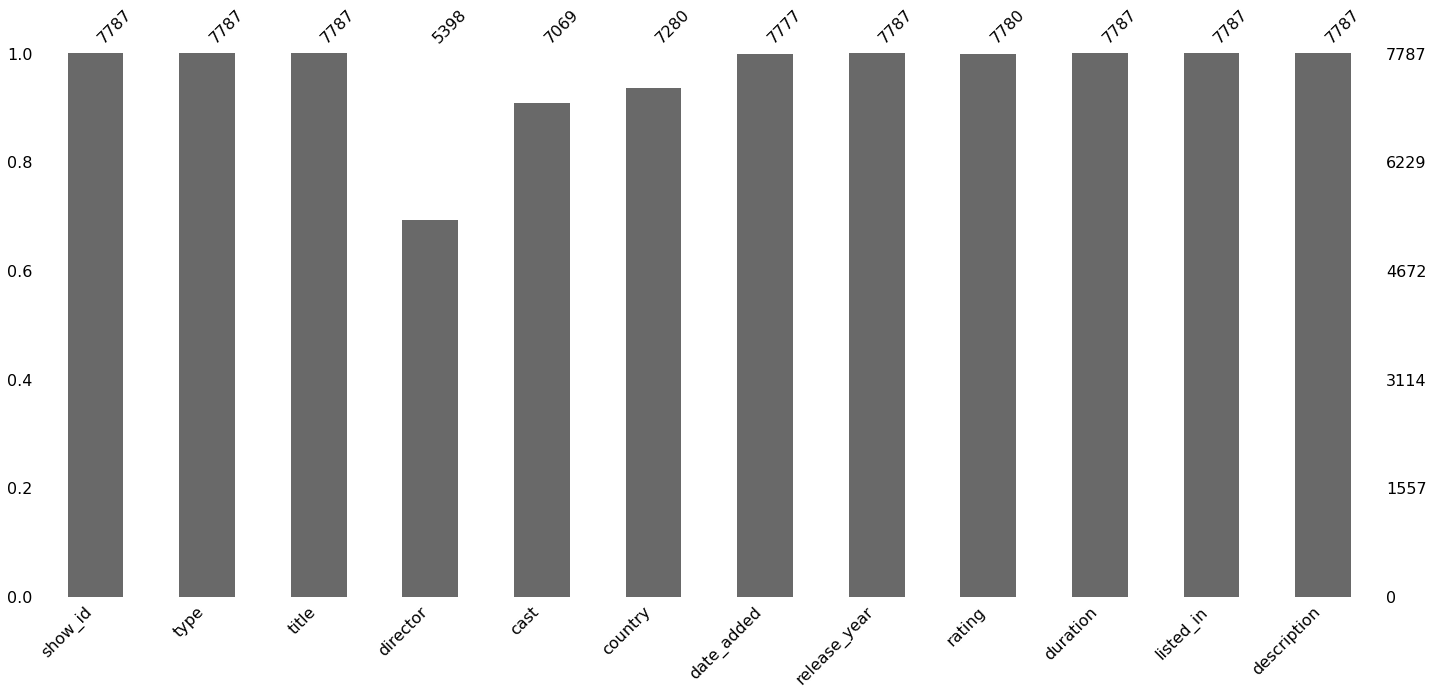

In [8]:
msno.bar(df)

**Observation:** This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

In [9]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df)*100
    if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 2)))
    

director's null rate: 30.68%
cast's null rate: 9.22%
country's null rate: 6.51%
date_added's null rate: 0.13%
rating's null rate: 0.09%


**Observation:** As per our earlier analysis, we can see that the 'director' column has the highest whereas 'rating' column has the lowest number of missing values!

In [10]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**Observation:** As I already assumed, all the show IDs and Titles are unique whereas others might have been repeated once or more times!

In [11]:
df[df["rating"].isnull()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year rating  duration  \
67              NaN    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

In [12]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    
df['rating'].isnull().sum()

0

**Observation:** All the missing values in the ratings column has been fixed!

In [13]:
df.drop(['director', 'cast'], inplace=True, axis=1)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
df=df[df["date_added"].notna()]

In [15]:
df.isnull().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

**Observation:** We have null values left only in the 'country' column. Let's try to fix it with the value which occurs the most number of times i.e. MODE

In [16]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [17]:
df['country'].nunique()

681

**Observation:** When looked upon the 'country' column closely, we see that there are some entry where it has multiple values. so I think I will add a new column with just the first one so we can check which regions have more productions

In [18]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [19]:
df['principal_country'].nunique()

81

**Observation:** Wow! Earlier there were 681 unique countries and we have reduced them to just 81. Such an amazing work!

In [20]:
df.isna().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
principal_country    0
dtype: int64

In [21]:
df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
principal_country    object
dtype: object

**Observation:**
* show_id, type, title, country, date_added, rating, duration, listed_in, description, principal_country are of object data type
* Only release_year is of int data type

In [22]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [23]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [24]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [25]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV-MA '], dtype=object)

**Observation:** This looks so much more clear. Using the target_ages column we can easily make out the intended audiance for a particular movie!

> Now let us try doing some pictorial representaion of our dataset

In [26]:
val = df['type'].value_counts().index
cnt = df['type'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='darkturquoise')])
fig.update_layout(title_text='Netflix Sources Distribution', title_x=0.5)
fig.show()

**Observation:** There are almost half the number of TV Shows than there are Movies on Netflix

In [27]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

(-1.249206881804385,
 1.2460185942325988,
 -1.2084540632962992,
 1.1940617104122628)

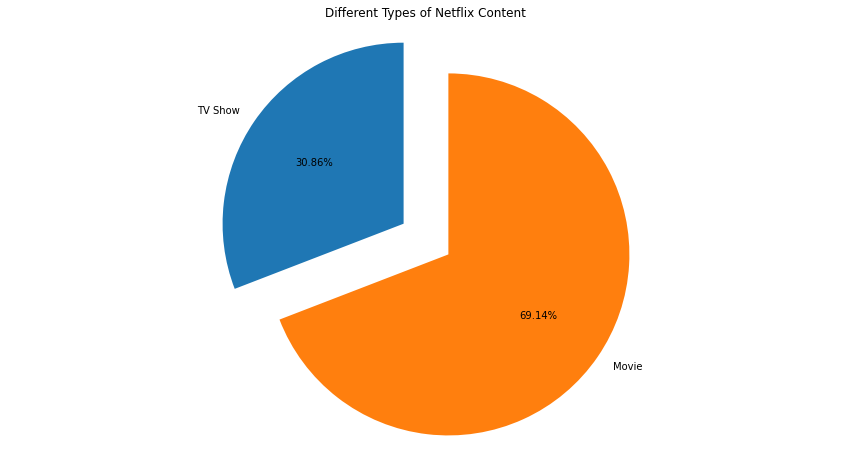

In [28]:
plt.figure(figsize=(15,8))
label=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

**Observation:** Nearly 2/3rd of the content on netflix are movies while the rest are TV Show

In [29]:
df_movie = df[df['type']=='Movie'].groupby('release_year').count()
df_tv = df[df['type']=='TV Show'].groupby('release_year').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="release_year", y="show_id")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['release_year'], y=df_movie['show_id'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['release_year'], y=df_tv['show_id'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()

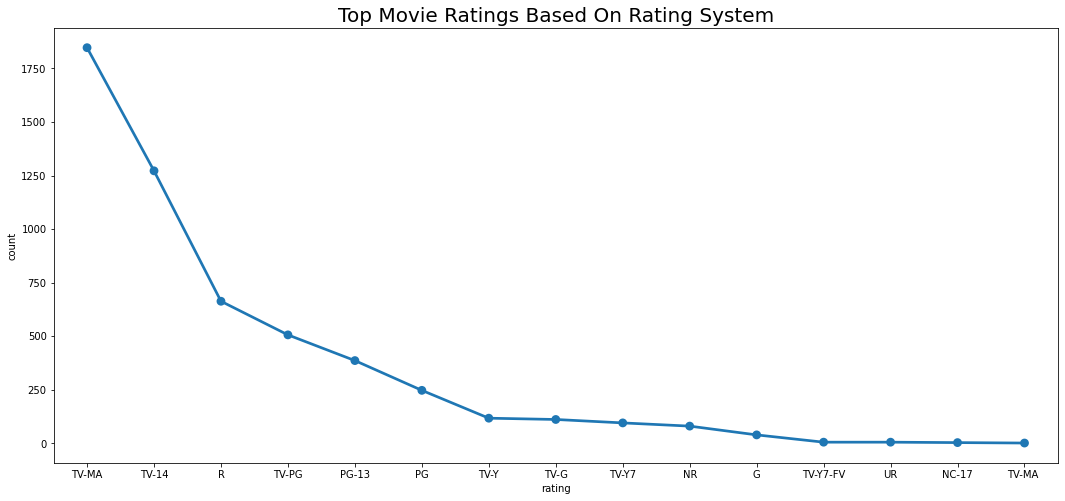

In [30]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

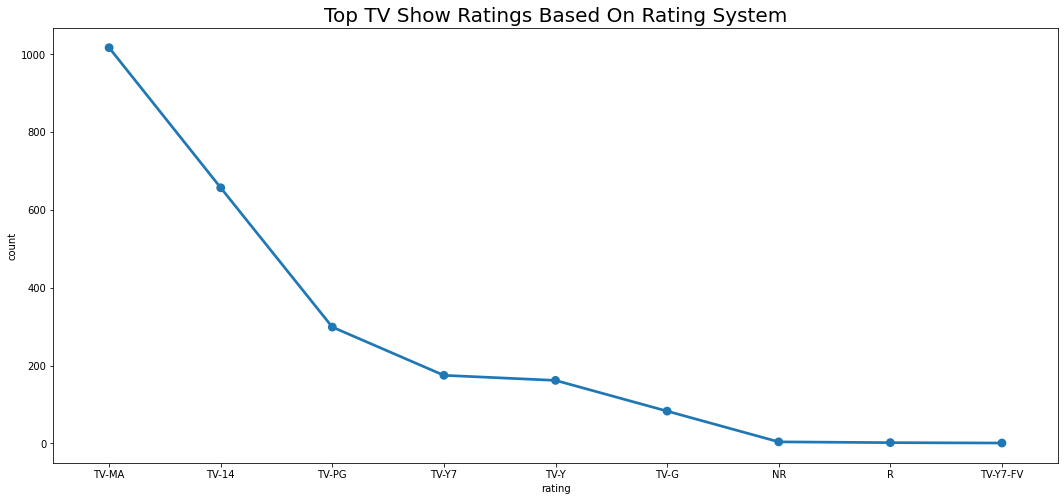

In [31]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

In [32]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df


rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

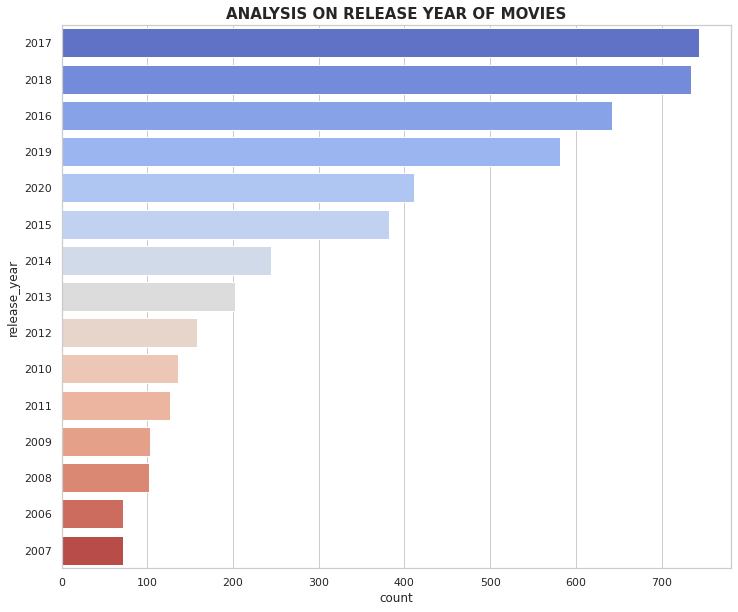

In [33]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", order=df_movie['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

**Observation:** Most of the movies were released in the year 2017 followed by 2018 and 2016.

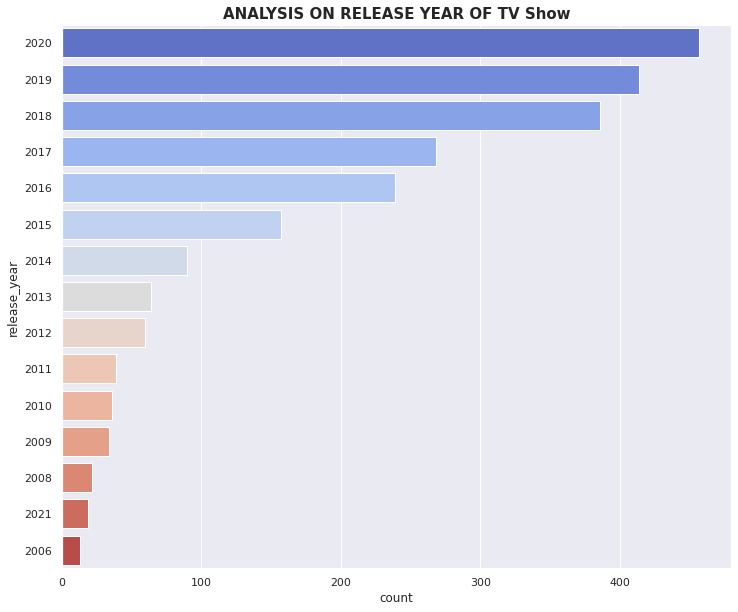

In [34]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

**Observation:** Most of the TV Shows were released in 2020 followed by 2019 and 2018


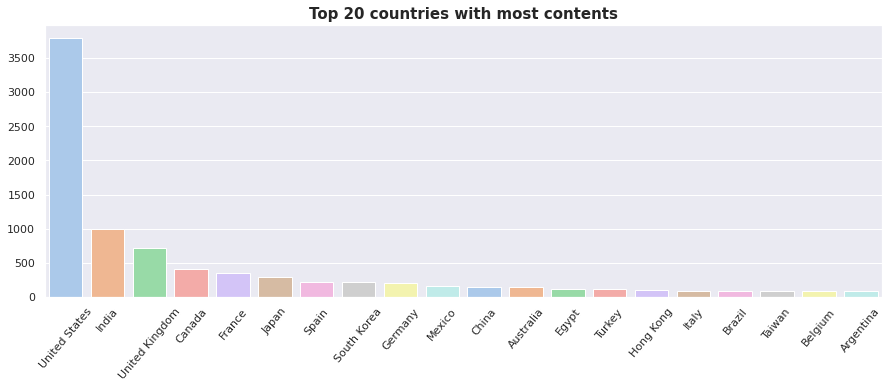

In [35]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

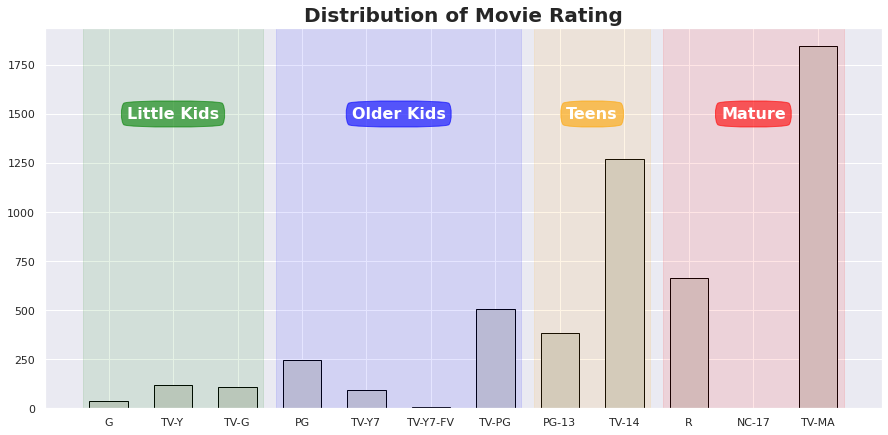

In [36]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
    

rating_barplot(movie_rating,'Movie', 1500)


**Observation:** There are much more movies for Older Kids, Teens and Mature than there are for the Little Kids!

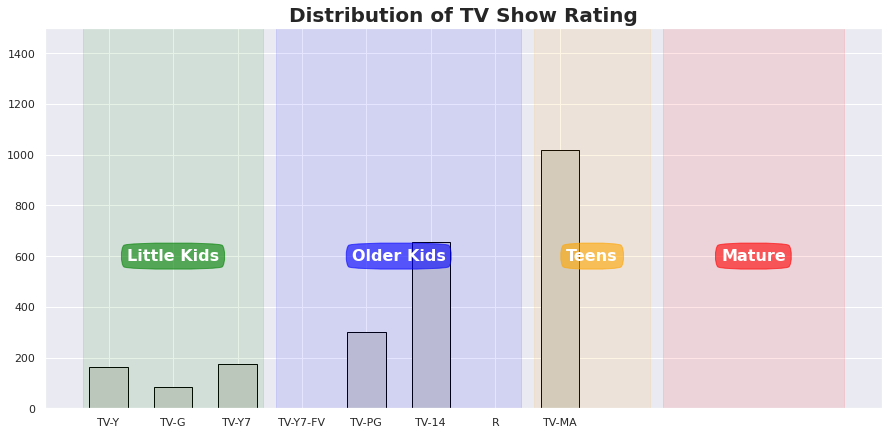

In [37]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

**Observation:** TV Show are more for the kids and teens.


In [38]:
import plotly.offline as py
py.offline.init_notebook_mode()
import pycountry


df1 = pd.DataFrame(dict1.items(), columns=['Country', 'Count'])
df2 = pd.DataFrame(dict2.items(), columns=['Country', 'Count'])

total = set(list(df1['Country'].append(df2['Country'])))

d_country_code = {}  # To hold the country names and their ISO
for country in total:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        #print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})
        
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v
    df2.loc[(df2.Country == k), 'iso_alpha'] = v
        
fig = px.scatter_geo(df1, locations="iso_alpha",
                     hover_name="Country", # column added to hover information
                     size="Count", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.update_layout(title_text='Top Countries where Movie are released', title_x=0.5)
fig.show()

fig = px.scatter_geo(df2, locations="iso_alpha",
                     hover_name="Country", # column added to hover information
                     size="Count", # size of markers, "pop" is one of the columns of gapminder
                     )

fig.update_layout(title_text='Top Countries where TV Shows are released', title_x=0.5)
fig.show()

NameError: name 'dict1' is not defined

In [39]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movie1 = df_movie['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movie1['percent'] = df_movie1['count'].apply(lambda x : 100*x/sum(df_movie1['count']))

t1 = go.Scatter(x=df_movie1['year_added'], y=df_movie1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


**Observation:**

* The growth in number of movies on netflix is much higher than that of TV shows
* About 1200 new movies were added in both 2018 and 2019
* The growth in content started from 2013

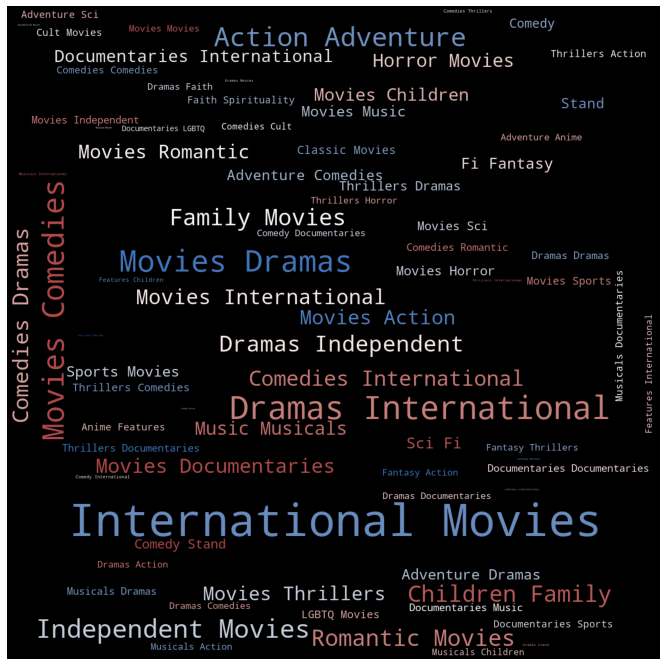

In [40]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Such an interesting output! I've used wordcloud for the first time. Lets try the same for TV Show as well!

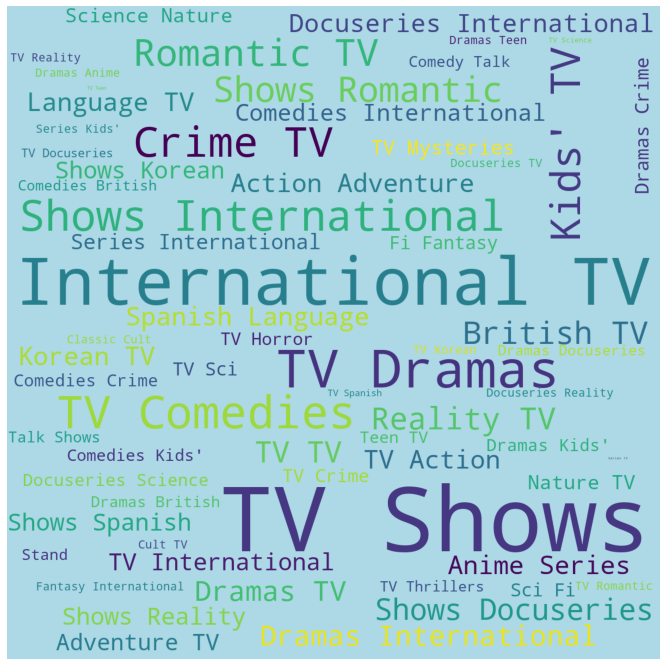

In [41]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightblue', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Note:** So, I've referred to two notebooks for this analysis:

* https://www.kaggle.com/sauravjoshi23/netflix-eda-and-data-visualization-plotly
* https://www.kaggle.com/bhartiprasad17/netflix-movies-and-tv-shows-eda

Thanks to the authors for creating such a wonderful notebook! I really learnt a lot from them.